In [1]:
import os, sys, tarfile
import numpy as np
import csv
import pdb
import data_preprocessing, data_generator, visual, label_parser
from transformations import RandomShift, RandomHorizontalFlip, Shift
import matplotlib.pyplot as plt
import cv2
import keras
from PIL import Image, ImageDraw
%matplotlib inline

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
TEST_PATH = '../udacity_driving_datasets/'
test_ann = label_parser.parse_annotation_json(TEST_PATH, 'labels_val.json')
print("len(test_ann) = ", len(test_ann))

len(test_ann) =  833


../udacity_driving_datasets//1479505755463282676.jpg
[array([  0, 123,  69,  61]), array([ 66, 139,  35,  32]), array([292, 127,  42,  35]), array([368, 131, 109,  60])]


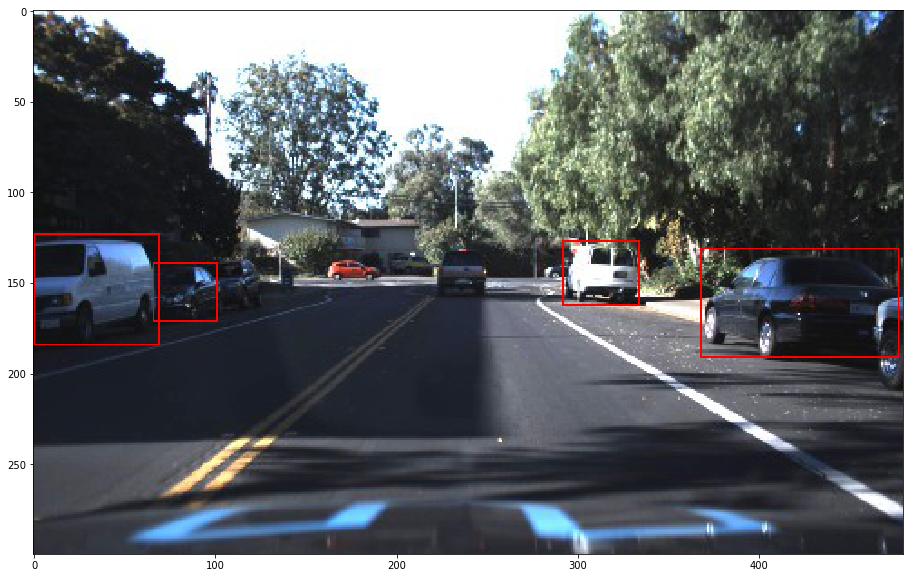

In [6]:
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['lines.markersize'] = 30
plt.rcParams['lines.linewidth'] = 5

filename = list(test_ann.keys())[2]
print(filename)
rects = test_ann[filename]
image = np.array(Image.open(filename))
plt.imshow(image)
print(rects)
# plt.imshow(image)
plt.imshow(visual.draw_image_rects(image, rects))

In [7]:
horizontal_flip = RandomHorizontalFlip()
image_aug, rects_aug = horizontal_flip(image, rects)

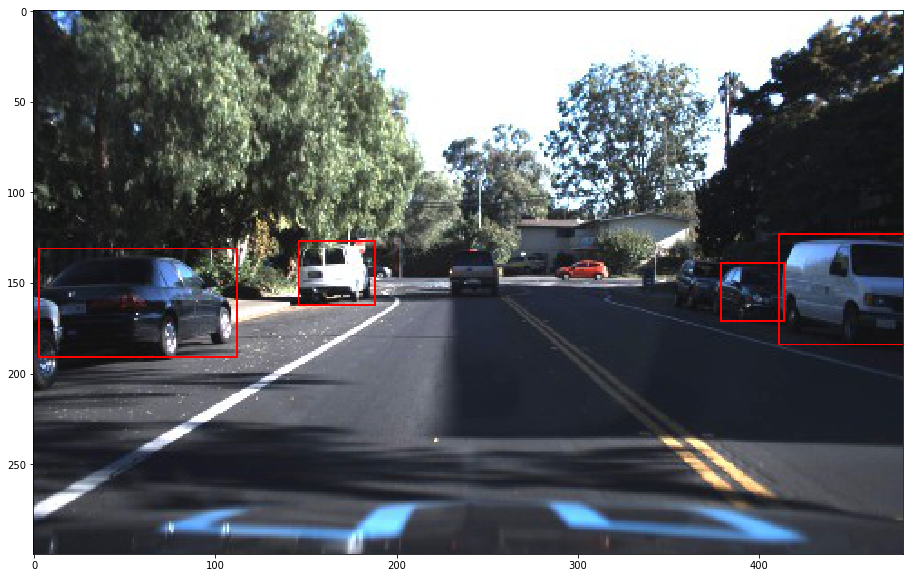

In [8]:
plt.imshow(visual.draw_image_rects(image_aug, rects_aug))

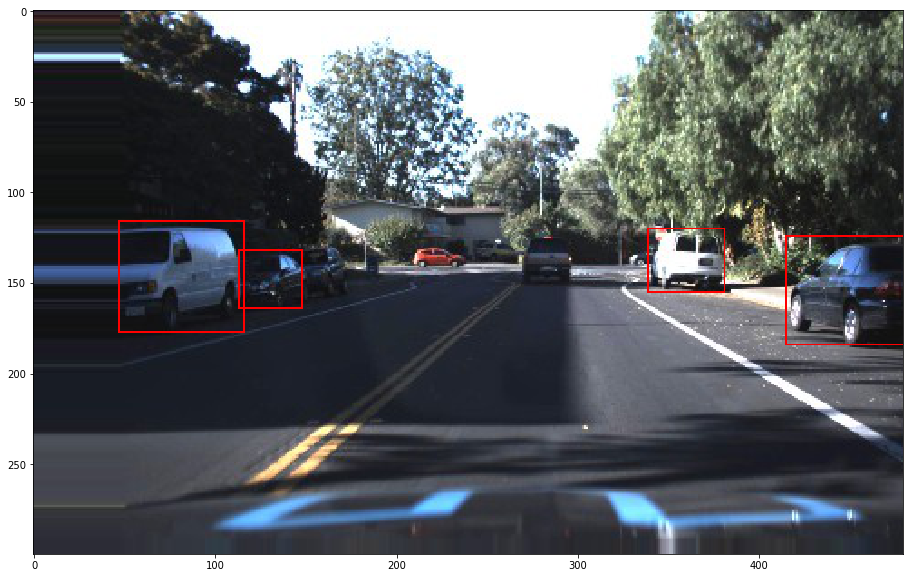

In [9]:
shift = RandomShift(0.2, 0.2)
image_aug, rects_aug = shift(image, rects)
plt.imshow(visual.draw_image_rects(image_aug, rects_aug))

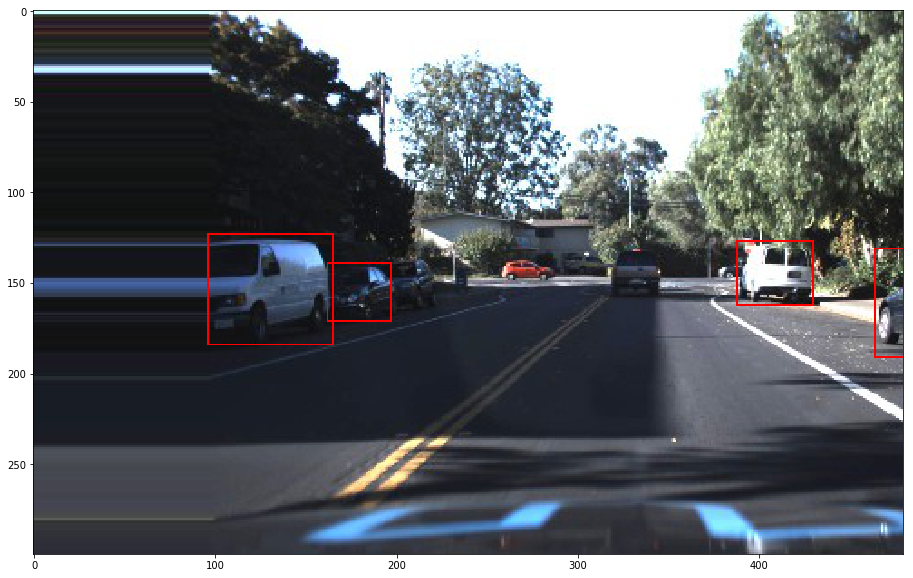

In [11]:
shift = Shift(0.2, 0.0)
image_aug, rects_aug = shift(image, rects)
plt.imshow(visual.draw_image_rects(image_aug, rects_aug))

In [51]:
def filter_rects(rects_aug):
    '''
    filter remove rectangles which centers are outside the image
    and cut rectangles which go out the image
    '''
    rects_aug_filtered = []
    for rect in rects_aug:
        x_c = rect[0] + rect[2] / 2.0
        y_c = rect[1] + rect[3] / 2.0
        x_max = rect[0] + rect[2]
        y_max = rect[1] + rect[3]
        w = image.shape[1]
        h = image.shape[0]
        if x_c < w and x_c > 0 and y_c < h  and y_c > 0: # at least half of image must be on image
            x_min = np.maximum(0, rect[0])
            y_min = np.maximum(0, rect[1])
            x_max = np.minimum(w-1, x_max)
            y_max = np.minimum(h-1, y_max)
            rects_aug_filtered += [np.array([x_min, y_min, x_max - x_min, y_max - y_min])]
    return rects_aug_filtered

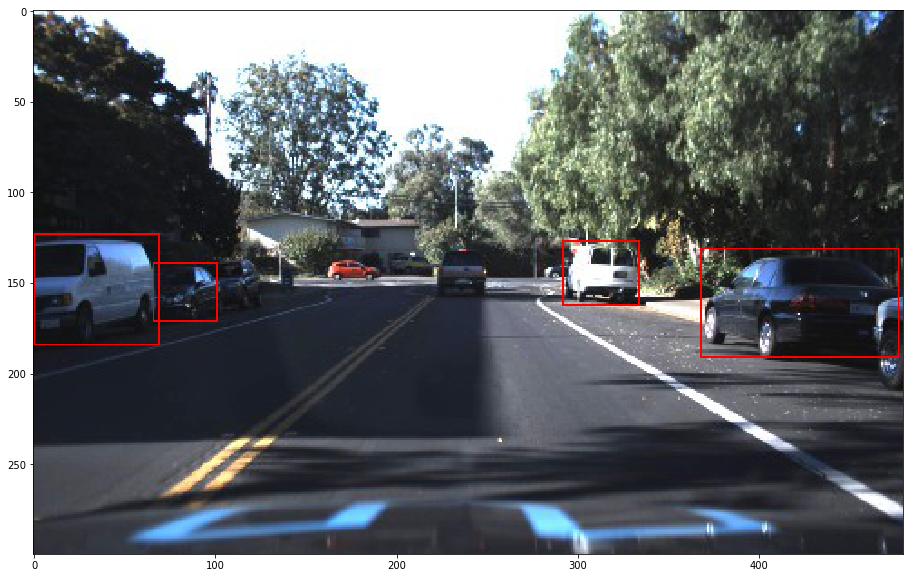

In [59]:
shift = Shift(0.0, 0.0)
image_aug, rects_aug = shift(image, rects)
filtered = filter_rects(rects_aug)
plt.imshow(visual.draw_image_rects(image_aug, filtered))

In [50]:
filtered

[array([ 48, 123,  64,  56]),
 array([114, 139,  30,  27]),
 array([340, 127,  37,  30]),
 array([416, 131,  64,  55])]